**STEP 1: Import Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


**STEP 2: Load the Dataset**

In [4]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**STEP 3: Understand the Dataset**

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.shape


(10000, 18)

**STEP 4: Drop Irrelevant Columns**

In [7]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])


**STEP 5: Check Missing Values**

In [8]:
df.isnull().sum()


CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**STEP 6: Target Variable (Churn)**

In [9]:
df["Exited"].value_counts()


0    7962
1    2038
Name: Exited, dtype: int64

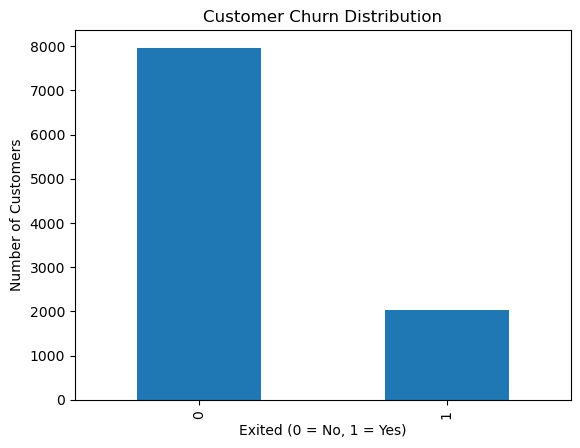

In [10]:
df["Exited"].value_counts().plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


**STEP 7: Churn Analysis by Gender**

In [11]:
gender_churn = pd.crosstab(df["Gender"], df["Exited"])
gender_churn


Exited,0,1
Gender,,
Female,3404,1139
Male,4558,899


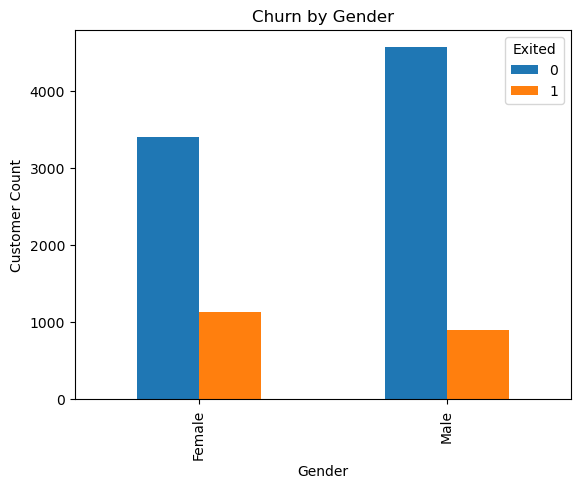

In [12]:
gender_churn.plot(kind="bar")
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.show()


**STEP 8: Churn Analysis by Geography**

In [13]:
geo_churn = pd.crosstab(df["Geography"], df["Exited"])
geo_churn


Exited,0,1
Geography,,
France,4203,811
Germany,1695,814
Spain,2064,413


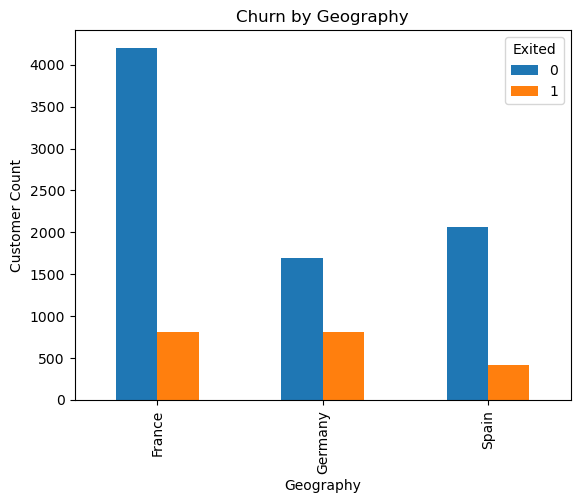

In [14]:
geo_churn.plot(kind="bar")
plt.title("Churn by Geography")
plt.xlabel("Geography")
plt.ylabel("Customer Count")
plt.show()


**STEP 9: Churn Analysis by Tenure**

In [15]:
tenure_churn = pd.crosstab(df["Tenure"], df["Exited"])
tenure_churn


Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


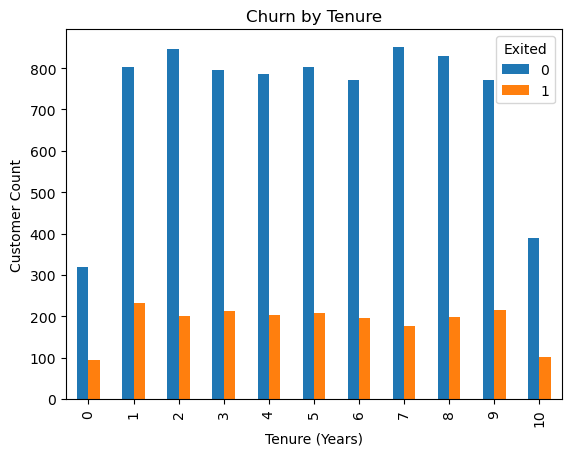

In [16]:
tenure_churn.plot(kind="bar")
plt.title("Churn by Tenure")
plt.xlabel("Tenure (Years)")
plt.ylabel("Customer Count")
plt.show()


**STEP 10: Age-wise Churn Analysis**

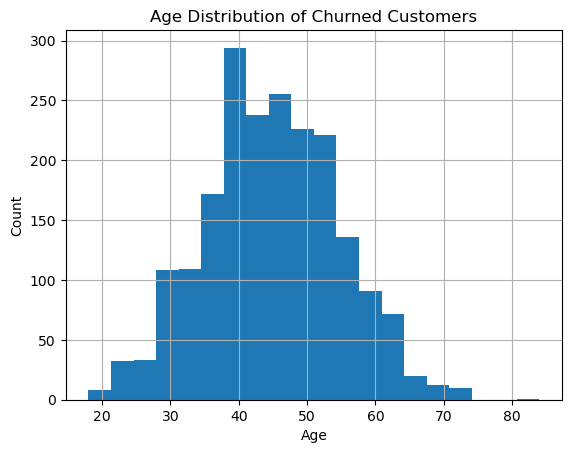

In [17]:
plt.figure()
df[df["Exited"] == 1]["Age"].hist(bins=20)
plt.title("Age Distribution of Churned Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**STEP 11: Active Member vs Churn**

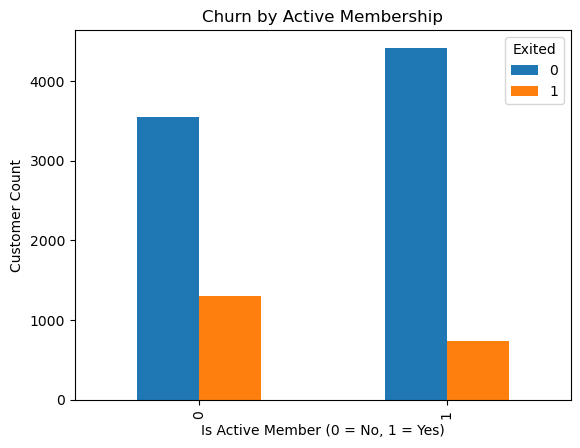

In [18]:
pd.crosstab(df["IsActiveMember"], df["Exited"]).plot(kind="bar")
plt.title("Churn by Active Membership")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()
